# Post Hoc Analyses for the Paper "SynMinE"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from sklearn.linear_model import LinearRegression

In [2]:
df_raw = pd.read_csv('PostHocAnalyses.csv', sep=';')
df_raw

,raw_name,combined_score,dimer_PAE,hydrophobicity_score,N_term_alpha_helix,MinD_PAE,solubility_score,synMinE_name,identity_ecoli,similarity_ecoli,...,ATPase_activity_rep10,ATPase_activity_rep11,ATPase_activity_rep12,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Sample_sequence_1791,1.757881,28.684210,1.878446,False,9.206502,0.734,synMinEv01,37.8,53.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sample_sequence_2177,3.668115,7.325448,2.500000,True,4.997211,0.816,synMinEv02,45.4,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sample_sequence_2935,0.971204,27.302663,1.479588,False,20.328893,0.752,synMinEv03,22.6,38.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sample_sequence_1469,3.257671,15.209676,2.489425,True,5.861131,0.809,synMinEv04,30.3,48.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sample_sequence_2803,3.479337,12.678044,2.477091,True,4.042709,0.822,synMinEv05,45.7,70.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sample_sequence_504,3.248278,14.814231,2.464548,True,5.538493,0.778,synMinEv06,29.4,46.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sample_sequence_309,1.778215,27.789209,1.488272,False,6.214650,0.768,synMinEv07,29.9,44.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Sample_sequence_437,1.936717,26.292508,1.612924,False,6.323319,0.795,synMinEv08,31.5,54.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Sample_sequence_3372,3.286456,6.758352,2.022079,False,3.029589,0.859,synMinEv09,17.9,33.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sample_sequence_3478,3.194333,17.216533,2.455000,True,5.266517,0.820,synMinEv10,41.8,65.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# make new hydrophobicity score as done in the final sumation: add 0.5 if N-terminus is structured. 
df_raw['hydrophobicity_score_summed'] = df_raw['hydrophobicity_score']
df_raw.loc[df_raw['N_term_alpha_helix'] == True,  'hydrophobicity_score_summed' ] += 0.5
df_raw[['hydrophobicity_score_summed', 'hydrophobicity_score', 'N_term_alpha_helix']]

,hydrophobicity_score_summed,hydrophobicity_score,N_term_alpha_helix
0,1.878446,1.878446,False
1,3.000000,2.500000,True
2,1.479588,1.479588,False
3,2.989425,2.489425,True
4,2.977091,2.477091,True
5,2.964548,2.464548,True
6,1.488272,1.488272,False
7,1.612924,1.612924,False
8,2.022079,2.022079,False
9,2.955000,2.455000,True


## Analysis of in silico scoring
We analyse which parts of the in silico scoring were helpful and which were not. 

### Individual Scores
Which individual scores of the four included (dimer_pae, minD_pae, Nterm_hydrophobicity, solubility) were significantly different (in the expected dircetion) between variants that did vs. did not oscillate in vitro?

In [4]:
# dimer_pae
dimer_pae_pos = df_raw.dimer_PAE[df_raw.positive_invitro == True].to_numpy()
dimer_pae_neg = df_raw.dimer_PAE[df_raw.positive_invitro == False].to_numpy()
U1_dimer, p_dimer = mannwhitneyu(dimer_pae_pos, dimer_pae_neg, method="exact", alternative='less') # small PAE is good
print(f'One-sided U-test p-value of dimer_pae: {p_dimer}')

# MinD_pae
MinD_pae_pos = df_raw.MinD_PAE[df_raw.positive_invitro == True].to_numpy()
MinD_pae_neg = df_raw.MinD_PAE[df_raw.positive_invitro == False].to_numpy()
U1_minD, p_minD = mannwhitneyu(MinD_pae_pos, MinD_pae_neg, method="exact", alternative='less') # small PAE is good
print(f'One-sided U-test p-value of minD_pae: {p_minD}')

# Nterm_hydrophobicity_raw
Nterm_hydrophobicity_pos = df_raw.hydrophobicity_score[df_raw.positive_invitro == True].to_numpy()
Nterm_hydrophobicity_neg = df_raw.hydrophobicity_score[df_raw.positive_invitro == False].to_numpy()
U1_Nterm_hydrophobicity, p_Nterm_hydrophobicity = mannwhitneyu(Nterm_hydrophobicity_pos, Nterm_hydrophobicity_neg, method="exact", alternative='greater') # large hydrophobicity is good
print(f'One-sided U-test p-value of Nterm_hydrophobicity_raw: {p_Nterm_hydrophobicity}')

# Nterm_hydrophobicity_summed = Nterm_hydrophobicity + 0.5 if N-terminal region is alpha_helical (as done in the scoring)
Nterm_hydrophobicity_summed_pos = df_raw.hydrophobicity_score_summed[df_raw.positive_invitro == True].to_numpy()
Nterm_hydrophobicity_summed_neg = df_raw.hydrophobicity_score_summed[df_raw.positive_invitro == False].to_numpy()
U1_Nterm_hydrophobicity_summed, p_Nterm_hydrophobicity_summed = mannwhitneyu(Nterm_hydrophobicity_summed_pos, Nterm_hydrophobicity_summed_neg, method="exact", alternative='greater') # large hydrophobicity is good
print(f'One-sided U-test p-value of Nterm_hydrophobicity_summed: {p_Nterm_hydrophobicity_summed}')

# solubility
solubility_pos = df_raw.solubility_score[df_raw.positive_invitro == True].to_numpy()
solubility_neg = df_raw.solubility_score[df_raw.positive_invitro == False].to_numpy()
U1_solubility, p_solubility = mannwhitneyu(solubility_pos, solubility_neg, method="exact", alternative='greater') # large solubility is good
print(f'One-sided U-test p-value of solubility: {p_solubility}')


One-sided U-test p-value of dimer_pae: 0.21919132913459122
One-sided U-test p-value of minD_pae: 0.019532886578047297
One-sided U-test p-value of Nterm_hydrophobicity_raw: 0.025848192540994533
One-sided U-test p-value of Nterm_hydrophobicity_summed: 0.010022089767856972
One-sided U-test p-value of solubility: 0.7874204668478777


We find that only the N-terminal hydrophobicity score and the MinD interaction score show significant differences between positive and negative variants _in vitro_. The dimer score might also be able to differenciate, but the p-value does not go low enough with the sample size we have to be significant. Interestingly, the solubility score not only fails to differenciate, but even shows a slightly higher score on average in the negative variants thtn in the positive ones. 

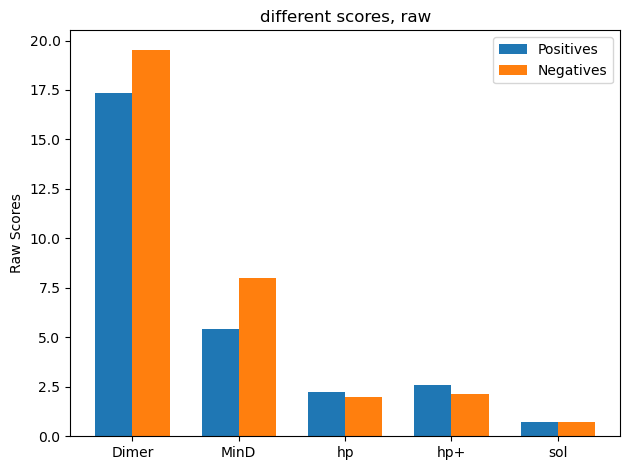

In [5]:
# plot raw mean barcharts

means_pos = [np.mean(dimer_pae_pos), np.mean(MinD_pae_pos), np.mean(Nterm_hydrophobicity_pos), np.mean(Nterm_hydrophobicity_summed_pos), np.mean(solubility_pos)]
means_neg = [np.mean(dimer_pae_neg), np.mean(MinD_pae_neg), np.mean(Nterm_hydrophobicity_neg), np.mean(Nterm_hydrophobicity_summed_neg), np.mean(solubility_neg)]

labels = ['Dimer', 'MinD', 'hp', 'hp+', 'sol']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_pos, width, label='Positives')
rects2 = ax.bar(x + width/2, means_neg, width, label='Negatives')

ax.set_ylabel('Raw Scores')
ax.set_title('different scores, raw')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [6]:
# Normalize as in the combined score

def normalise(data, min, max):
    return (data - min) / (max - min)

min_dimer = 6.758351606
max_dimer = 29.41825026

min_hp = 1.260714286
max_hp = 2.5

min_hpp = 1.260714286
max_hpp = 3

min_MinD = 2.849744057
max_MinD = 20.32889308

min_sol = 0.409
max_sol = 0.947

# dimer_pae
dimer_pae_norm_pos = normalise(df_raw.dimer_PAE[df_raw.positive_invitro == True].to_numpy(), min_dimer, max_dimer)
dimer_pae_norm_neg = normalise(df_raw.dimer_PAE[df_raw.positive_invitro == False].to_numpy(), min_dimer, max_dimer)
U1_dimer_norm, p_dimer_norm = mannwhitneyu(dimer_pae_norm_pos, dimer_pae_norm_neg, method="exact", alternative='less') # small PAE is good
print(f'One-sided U-test p-value of dimer_pae: {p_dimer_norm}')

# MinD_pae
MinD_pae_norm_pos = normalise(df_raw.MinD_PAE[df_raw.positive_invitro == True].to_numpy(), min_MinD, max_MinD)
MinD_pae_norm_neg = normalise(df_raw.MinD_PAE[df_raw.positive_invitro == False].to_numpy(), min_MinD, max_MinD)
U1_minD_norm, p_minD_norm = mannwhitneyu(MinD_pae_norm_pos, MinD_pae_norm_neg, method="exact", alternative='less') # small PAE is good
print(f'One-sided U-test p-value of minD_pae: {p_minD_norm}')

# Nterm_hydrophobicity_raw
Nterm_hydrophobicity_norm_pos = normalise(df_raw.hydrophobicity_score[df_raw.positive_invitro == True].to_numpy(), min_hp, max_hp)
Nterm_hydrophobicity_norm_neg = normalise(df_raw.hydrophobicity_score[df_raw.positive_invitro == False].to_numpy(), min_hp, max_hp)
U1_Nterm_hydrophobicity_norm, p_Nterm_hydrophobicity_norm = mannwhitneyu(Nterm_hydrophobicity_norm_pos, Nterm_hydrophobicity_norm_neg, method="exact", alternative='greater') # large hydrophobicity is good
print(f'One-sided U-test p-value of Nterm_hydrophobicity_raw: {p_Nterm_hydrophobicity_norm}')

# Nterm_hydrophobicity_summed = Nterm_hydrophobicity + 0.5 if N-terminal region is alpha_helical (as done in the scoring)
Nterm_hydrophobicity_summed_norm_pos = normalise(df_raw.hydrophobicity_score_summed[df_raw.positive_invitro == True].to_numpy(), min_hpp, max_hpp)
Nterm_hydrophobicity_summed_norm_neg = normalise(df_raw.hydrophobicity_score_summed[df_raw.positive_invitro == False].to_numpy(), min_hpp, max_hpp)
U1_Nterm_hydrophobicity_summed_norm, p_Nterm_hydrophobicity_summed_norm = mannwhitneyu(Nterm_hydrophobicity_summed_norm_pos, Nterm_hydrophobicity_summed_norm_neg, method="exact", alternative='greater') # large hydrophobicity is good
print(f'One-sided U-test p-value of Nterm_hydrophobicity_summed: {p_Nterm_hydrophobicity_summed_norm}')

# solubility
solubility_norm_pos = normalise(df_raw.solubility_score[df_raw.positive_invitro == True].to_numpy(), min_sol, max_sol)
solubility_norm_neg = normalise(df_raw.solubility_score[df_raw.positive_invitro == False].to_numpy(), min_sol, max_sol)
U1_solubility_norm, p_solubility_norm = mannwhitneyu(solubility_norm_pos, solubility_norm_neg, method="exact", alternative='greater') # large solubility is good
print(f'One-sided U-test p-value of solubility: {p_solubility_norm}')


One-sided U-test p-value of dimer_pae: 0.21919132913459122
One-sided U-test p-value of minD_pae: 0.019532886578047297
One-sided U-test p-value of Nterm_hydrophobicity_raw: 0.025848192540994533
One-sided U-test p-value of Nterm_hydrophobicity_summed: 0.010022089767856972
One-sided U-test p-value of solubility: 0.7874204668478777


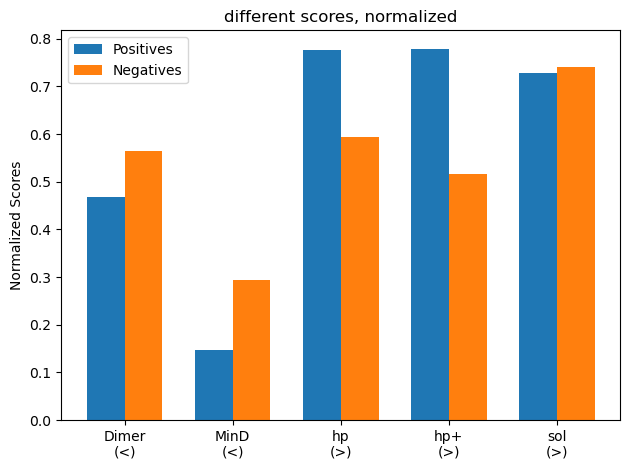

In [7]:
# plot raw mean barcharts

means_norm_pos = [np.mean(dimer_pae_norm_pos), np.mean(MinD_pae_norm_pos), np.mean(Nterm_hydrophobicity_norm_pos), np.mean(Nterm_hydrophobicity_summed_norm_pos), np.mean(solubility_pos)]
means_norm_neg = [np.mean(dimer_pae_norm_neg), np.mean(MinD_pae_norm_neg), np.mean(Nterm_hydrophobicity_norm_neg), np.mean(Nterm_hydrophobicity_summed_norm_neg), np.mean(solubility_neg)]

labels = ['Dimer\n(<)', 'MinD\n(<)', 'hp\n(>)', 'hp+\n(>)', 'sol\n(>)']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_norm_pos, width, label='Positives')
rects2 = ax.bar(x + width/2, means_norm_neg, width, label='Negatives')

ax.set_ylabel('Normalized Scores')
ax.set_title('different scores, normalized')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [8]:
# initial combined score
combined_initial_pos = 1 - dimer_pae_norm_pos + 1 - MinD_pae_norm_pos + Nterm_hydrophobicity_summed_norm_pos + solubility_pos
combined_initial_neg = dimer_pae_norm_neg + MinD_pae_norm_neg + Nterm_hydrophobicity_summed_norm_neg + solubility_neg
U1_combined_init, p_combined_init = mannwhitneyu(combined_initial_pos, combined_initial_neg, method="exact", alternative='greater') # small PAE is good
print(f'One-sided U-test p-value of combined_initial: {p_combined_init}')

# improved (post-hoc) combined score
combined_improved_pos = 1 - MinD_pae_norm_pos + Nterm_hydrophobicity_summed_norm_pos
combined_improved_neg = MinD_pae_norm_neg + Nterm_hydrophobicity_summed_norm_neg
U1_combined_improved, p_combined_improved = mannwhitneyu(combined_improved_pos, combined_improved_neg, method="exact", alternative='greater') # small PAE is good
print(f'One-sided U-test p-value of combined_improved: {p_combined_improved}')


One-sided U-test p-value of combined_initial: 0.0017855068485667434
One-sided U-test p-value of combined_improved: 1.7562176676374624e-07


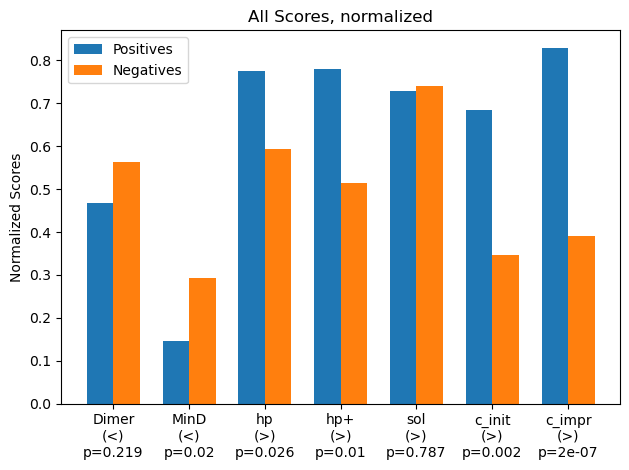

In [9]:
# plot combined mean barcharts

labels = [f'Dimer\n(<)\np={np.round(p_dimer_norm, 3)}', 
            f'MinD\n(<)\np={np.round(p_minD_norm, 3)}', 
            f'hp\n(>)\np={np.round(p_Nterm_hydrophobicity_norm, 3)}', 
            f'hp+\n(>)\np={np.round(p_Nterm_hydrophobicity_summed_norm, 3)}', 
            f'sol\n(>)\np={np.round(p_solubility_norm, 3)}', 
            f'c_init\n(>)\np={np.round(p_combined_init, 3)}', 
            f'c_impr\n(>)\np={np.round(p_combined_improved, 7)}']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

min_initial = np.amin(np.concatenate((combined_initial_pos, combined_initial_neg)))
max_initial = np.amax(np.concatenate((combined_initial_pos, combined_initial_neg)))

min_improved = np.amin(np.concatenate((combined_improved_pos, combined_improved_neg)))
max_improved = np.amax(np.concatenate((combined_improved_pos, combined_improved_neg)))

means_all_pos = np.concatenate((means_norm_pos, [np.mean(normalise(combined_initial_pos, min_initial, max_initial)), np.mean(normalise(combined_improved_pos, min_improved, max_improved))]))
means_all_neg = np.concatenate((means_norm_neg, [np.mean(normalise(combined_initial_neg, min_initial, max_initial)), np.mean(normalise(combined_improved_neg, min_improved, max_improved))]))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means_all_pos, width, label='Positives')
rects2 = ax.bar(x + width/2, means_all_neg, width, label='Negatives')

ax.set_ylabel('Normalized Scores')
ax.set_title('All Scores, normalized')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Correlations between _in silico_ and _in vitro_ characterisation scores
We analyse if there exist correlations between the in silico scores and the values obtained in the biophysical characterisation prformed with selected purified proteins. However, all these experimentally characterised proteins are from the "good" in silico group, and all produce waves in vitro. The in silico scoring can only give a very rough estimate, while these protiens by pre-selection are most likely very similar. Hence, correlations are not expected. 

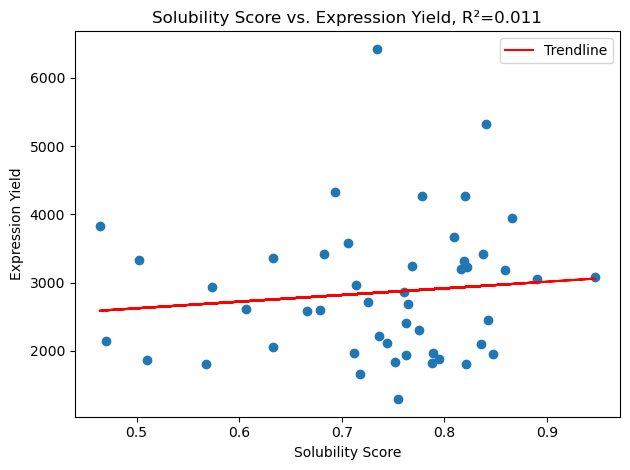

In [10]:
# PURE expression
df_raw['expression_yield_mean'] = np.mean((df_raw.expression_yield_rep1, df_raw.expression_yield_rep2, df_raw.expression_yield_rep3), axis=0)

reg = LinearRegression().fit(df_raw['solubility_score'].to_numpy().reshape(-1, 1), df_raw['expression_yield_mean'].to_numpy().reshape(-1, 1))
Rsq = reg.score(df_raw['solubility_score'].to_numpy().reshape(-1, 1), df_raw['expression_yield_mean'].to_numpy().reshape(-1, 1))

reg_line = reg.predict(df_raw['solubility_score'].to_numpy().reshape(-1, 1))

fig, ax = plt.subplots()
scatter = ax.scatter(df_raw['solubility_score'], df_raw['expression_yield_mean'])
line = ax.plot(df_raw['solubility_score'], reg_line, color='r', label='Trendline')
ax.set_title(f'Solubility Score vs. Expression Yield, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Solubility Score')
ax.set_ylabel('Expression Yield')
ax.legend()
fig.tight_layout()

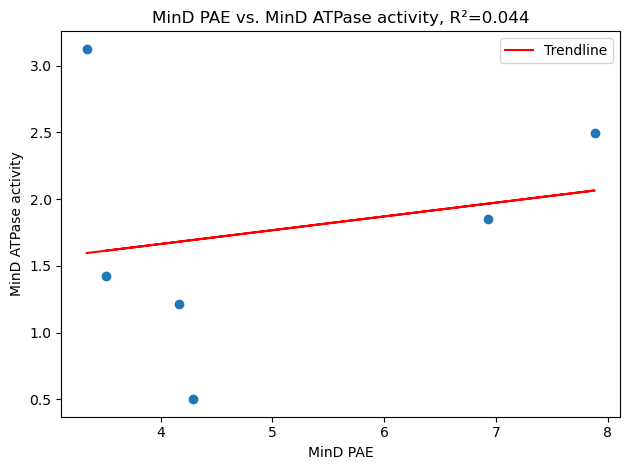

In [11]:
# MinD ATPase activity
df_raw['ATPase_activity_mean'] = np.mean((df_raw.ATPase_activity_rep1, df_raw.ATPase_activity_rep2, df_raw.ATPase_activity_rep3, df_raw.ATPase_activity_rep4, df_raw.ATPase_activity_rep5, df_raw.ATPase_activity_rep6, df_raw.ATPase_activity_rep7, df_raw.ATPase_activity_rep8, df_raw.ATPase_activity_rep9, df_raw.ATPase_activity_rep10, df_raw.ATPase_activity_rep11, df_raw.ATPase_activity_rep12), axis=0)

reg = LinearRegression().fit(df_raw[df_raw['ATPase_activity_mean'] > 0].MinD_PAE.to_numpy().reshape(-1, 1), df_raw['ATPase_activity_mean'].dropna().to_numpy().reshape(-1, 1))
Rsq = reg.score(df_raw[df_raw['ATPase_activity_mean'] > 0].MinD_PAE.to_numpy().reshape(-1, 1), df_raw['ATPase_activity_mean'].dropna().to_numpy().reshape(-1, 1))

reg_line = reg.predict(df_raw[df_raw['ATPase_activity_mean'] > 0].MinD_PAE.to_numpy().reshape(-1, 1))

fig, ax = plt.subplots()
scatter = ax.scatter(df_raw[df_raw['ATPase_activity_mean'] > 0].MinD_PAE, df_raw['ATPase_activity_mean'].dropna())
line = ax.plot(df_raw[df_raw['ATPase_activity_mean'] > 0].MinD_PAE, reg_line, color='r', label='Trendline')
ax.set_title(f'MinD PAE vs. MinD ATPase activity, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('MinD PAE')
ax.set_ylabel('MinD ATPase activity')
ax.legend()
fig.tight_layout()

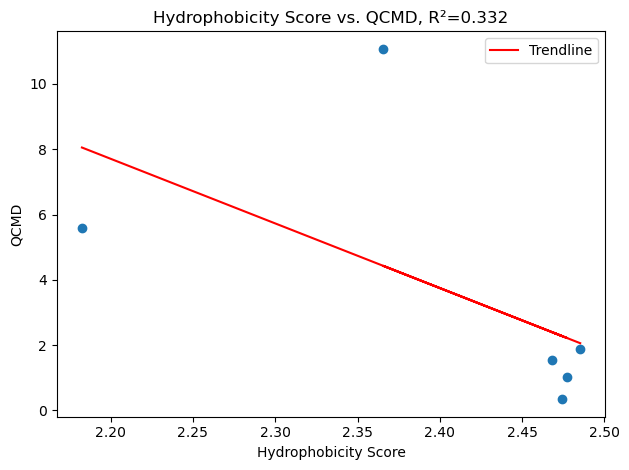

In [12]:
# Membrane Binding (QCMD)
df_raw['qcmd_mean'] = np.mean((df_raw.qcmd_rep1, df_raw.qcmd_rep2, df_raw.qcmd_rep3), axis=0)

reg = LinearRegression().fit(df_raw[df_raw['qcmd_mean'] > 0].hydrophobicity_score.to_numpy().reshape(-1, 1), df_raw['qcmd_mean'].dropna().to_numpy().reshape(-1, 1))
Rsq = reg.score(df_raw[df_raw['qcmd_mean'] > 0].hydrophobicity_score.to_numpy().reshape(-1, 1), df_raw['qcmd_mean'].dropna().to_numpy().reshape(-1, 1))

reg_line = reg.predict(df_raw[df_raw['qcmd_mean'] > 0].hydrophobicity_score.to_numpy().reshape(-1, 1))

fig, ax = plt.subplots()
scatter = ax.scatter(df_raw[df_raw['qcmd_mean'] > 0].hydrophobicity_score, df_raw['qcmd_mean'].dropna())
line = ax.plot(df_raw[df_raw['qcmd_mean'] > 0].hydrophobicity_score, reg_line, color='r', label='Trendline')
ax.set_title(f'Hydrophobicity Score vs. QCMD, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Hydrophobicity Score')
ax.set_ylabel('QCMD')
ax.legend()
fig.tight_layout()

## Sequence Similarity to natural proteins
Similarity to known proteins is usually used when classifying novel proteins. We performed a BLAST search for all our variants and analysed the correlation of the sequence identity/similarity of the variant and its closest homolog/E. coli to the combined score(s) we used for the in silico validation. We found that sequences with higher sequence identity/similarity to known proteins tend to show higher in silico values. 

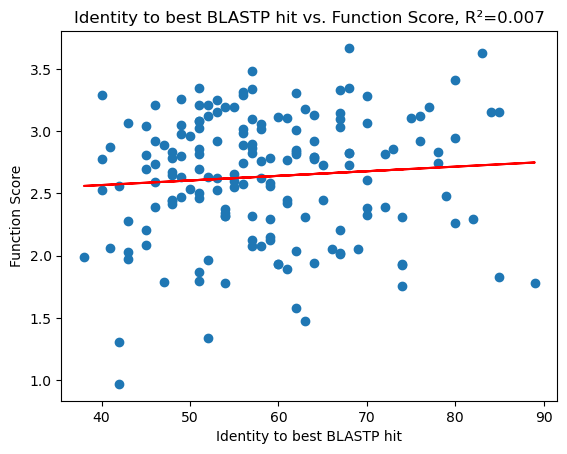

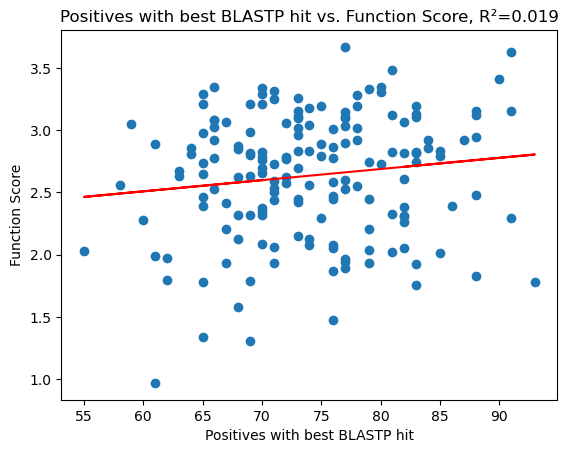

In [13]:
# Parsing the raw BLASTP output (for all scored 167 seqs)
blastp_raw = open('./BLASTP_Result.txt').read().strip().split('Query= ')[1:]
blastp_dict = {entry.split('\n')[0]: ''.join(entry.split('\n')[1:]) for entry in blastp_raw}
blastp_names = {k: v.split('>')[1].split(' ')[0] for k, v in blastp_dict.items()}
blastp_identities = {k: int(v.split('Identities = ')[1].split('(')[1].split('%')[0]) for k, v in blastp_dict.items()}
blastp_positives = {k: int(v.split('Positives = ')[1].split('(')[1].split('%')[0]) for k, v in blastp_dict.items()}

# get all function scores (167 in total)
all_raw_scores = pd.read_csv('./all_raw_scores.tsv', delimiter='\t')
all_scores = pd.Series(all_raw_scores.Score.values,index=all_raw_scores.Name).to_dict()

# make lists
scores = []
identities = []
positives = []
names = []
for k,v in blastp_names.items():
    scores.append(float(all_scores[k].replace(',','.')))
    identities.append(blastp_identities[k])
    positives.append(blastp_positives[k])
    names.append(v)

# plot

# seq ident
reg = LinearRegression().fit(np.array(identities).reshape(-1, 1) , np.array(scores).reshape(-1, 1) )
Rsq = reg.score(np.array(identities).reshape(-1, 1) , np.array(scores).reshape(-1, 1) )
reg_line = reg.predict(np.array(identities).reshape(-1, 1) )
fig, ax = plt.subplots()
scatter = ax.scatter(np.array(identities), np.array(scores))
line = ax.plot(np.array(identities), reg_line, color='r', label='Trendline')
ax.set_title(f'Identity to best BLASTP hit vs. Function Score, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Identity to best BLASTP hit')
ax.set_ylabel('Function Score')
plt.show()

# seq positives (=similarity)
reg = LinearRegression().fit(np.array(positives).reshape(-1, 1) , np.array(scores).reshape(-1, 1) )
Rsq = reg.score(np.array(positives).reshape(-1, 1) , np.array(scores).reshape(-1, 1) )
reg_line = reg.predict(np.array(positives).reshape(-1, 1) )
fig, ax = plt.subplots()
scatter = ax.scatter(np.array(positives), np.array(scores))
line = ax.plot(np.array(positives), reg_line, color='r', label='Trendline')
ax.set_title(f'Positives with best BLASTP hit vs. Function Score, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Positives with best BLASTP hit')
ax.set_ylabel('Function Score')
plt.show()




/var/folders/91/m82jhw1j777cjhwlgy6zj4sw0000gn/T/ipykernel_80539/1413695863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['combined_score_initial'][df_raw.positive_invitro == True] = combined_initial_pos
/var/folders/91/m82jhw1j777cjhwlgy6zj4sw0000gn/T/ipykernel_80539/1413695863.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.4793368  3.19433309 3.41251724 3.6274453  3.15150937 3.32874907
 3.28732892 2.01133716 1.4744903  1.82691846 3.30743394 3.31126476
 3.15566588 1.93773225]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_raw['combined_score_initial'][df_raw.positive_invitro == True] = combined_initial_pos
/var/folders/91/m82jhw1j777cjhwlgy6zj4sw0000gn/T/ipykernel_

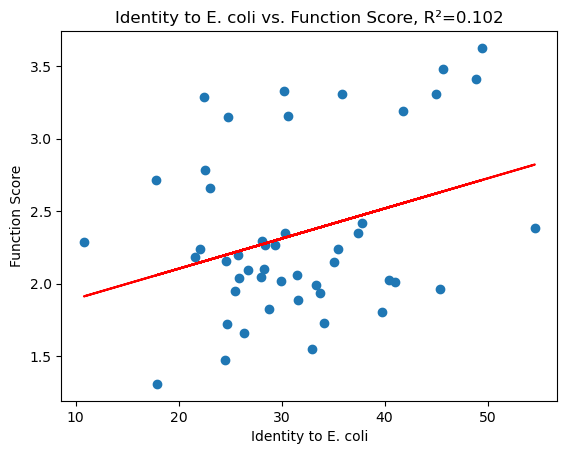

In [14]:
df_raw['combined_score_initial'] = 0
df_raw['combined_score_initial'][df_raw.positive_invitro == True] = combined_initial_pos
df_raw['combined_score_initial'][df_raw.positive_invitro == False] = combined_initial_neg

df_raw['combined_score_improved'] = 0
df_raw['combined_score_improved'][df_raw.positive_invitro == True] = combined_improved_pos
df_raw['combined_score_improved'][df_raw.positive_invitro == False] = combined_improved_neg

# seq ident to E. coli
reg = LinearRegression().fit(df_raw['identity_ecoli'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
Rsq = reg.score(df_raw['identity_ecoli'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
reg_line = reg.predict(df_raw['identity_ecoli'].to_numpy().reshape(-1, 1))
fig, ax = plt.subplots()
scatter = ax.scatter(df_raw.identity_ecoli, df_raw['combined_score_initial'])
line = ax.plot(df_raw['identity_ecoli'], reg_line, color='r', label='Trendline')
ax.set_title(f'Identity to E. coli vs. Function Score, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Identity to E. coli')
ax.set_ylabel('Function Score')
plt.show()

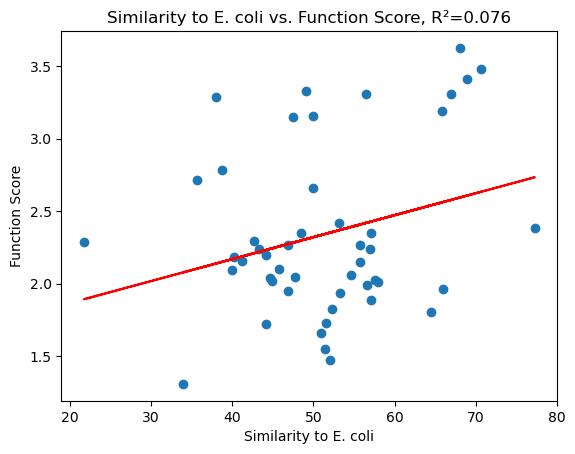

In [15]:
# seq similarity to E. coli
reg = LinearRegression().fit(df_raw['similarity_ecoli'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
Rsq = reg.score(df_raw['similarity_ecoli'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
reg_line = reg.predict(df_raw['similarity_ecoli'].to_numpy().reshape(-1, 1))
fig, ax = plt.subplots()
scatter = ax.scatter(df_raw['similarity_ecoli'], df_raw['combined_score_initial'])
line = ax.plot(df_raw['similarity_ecoli'], reg_line, color='r', label='Trendline')
ax.set_title(f'Similarity to E. coli vs. Function Score, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Similarity to E. coli')
ax.set_ylabel('Function Score')
plt.show()

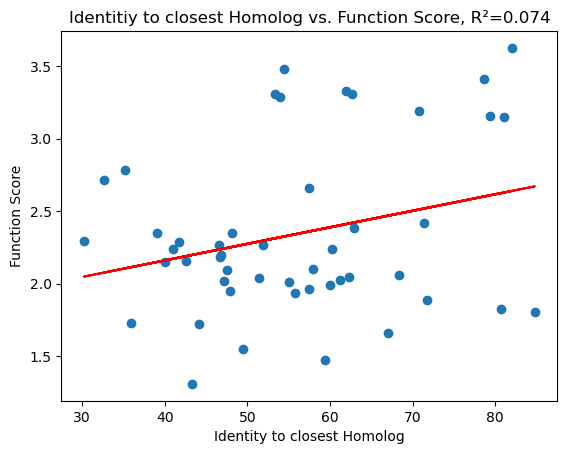

In [16]:
# seq identity to Closest
reg = LinearRegression().fit(df_raw['identity_closest'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
Rsq = reg.score(df_raw['identity_closest'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
reg_line = reg.predict(df_raw['identity_closest'].to_numpy().reshape(-1, 1))
fig, ax = plt.subplots()
scatter = ax.scatter(df_raw['identity_closest'], df_raw['combined_score_initial'])
line = ax.plot(df_raw['identity_closest'], reg_line, color='r', label='Trendline')
ax.set_title(f'Identitiy to closest Homolog vs. Function Score, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Identity to closest Homolog')
ax.set_ylabel('Function Score')
plt.show()

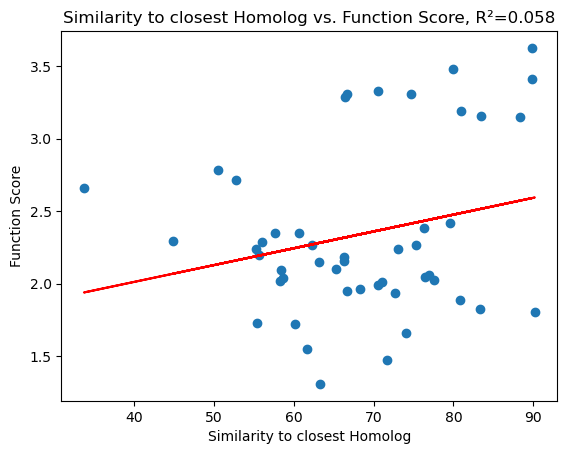

In [17]:
# seq similarity to Closest
reg = LinearRegression().fit(df_raw['similarity_closest'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
Rsq = reg.score(df_raw['similarity_closest'].to_numpy().reshape(-1, 1), df_raw['combined_score_initial'].to_numpy().reshape(-1, 1))
reg_line = reg.predict(df_raw['similarity_closest'].to_numpy().reshape(-1, 1))
fig, ax = plt.subplots()
scatter = ax.scatter(df_raw['similarity_closest'], df_raw['combined_score_initial'])
line = ax.plot(df_raw['similarity_closest'], reg_line, color='r', label='Trendline')
ax.set_title(f'Similarity to closest Homolog vs. Function Score, R\u00b2={np.round(Rsq,3)}')
ax.set_xlabel('Similarity to closest Homolog')
ax.set_ylabel('Function Score')
plt.show()

# ROC curves

In [24]:
# add avrg elbo loss to df
elbo_path = '../Data/elbo_df.csv'
df_elbo = pd.read_csv(elbo_path)
df_raw = df_raw.sort_values('synMinE_name')
df_raw['elbo_normalised'] = -df_elbo.elbo

# add HMMer scores
hmm_path = './hmmsearch_scores.out'
hmm_file_raw = open(hmm_path, 'r').read().strip().split('\n')
hmms = {'synMinE_name': [], 'hmm_score_normalised': []}
for entry in hmm_file_raw:
    if entry[0] == '#':
        continue
    name = entry[:10].strip()
    score = float(entry[74:80])
    hmms['synMinE_name'].append(name)
    hmms['hmm_score_normalised'].append(score)
df_hmm = pd.DataFrame(hmms)
df_raw = pd.concat([df_raw.set_index('synMinE_name'),df_hmm.set_index('synMinE_name')], axis=1, join='inner').reset_index()

,synMinE_name,raw_name,combined_score,dimer_PAE,hydrophobicity_score,N_term_alpha_helix,MinD_PAE,solubility_score,identity_ecoli,similarity_ecoli,...,dimer_PAE_normalised,MinD_PAE_normalised,hydrophobicity_score_summed_normalised,solubility_score_normalised,identity_ecoli_normalised,similarity_ecoli_normalised,identity_closest_normalised,similarity_closest_normalised,positive_invitro_int,hmm_score_normalised
2,synMinEv03,Sample_sequence_2935,0.971204,27.302663,1.479588,False,20.328893,0.752,22.6,38.7,...,0.093363,0.000000,0.125841,0.637546,0.269406,0.305755,0.091575,0.297345,0,24.7
23,synMinEv24,Sample_sequence_3890,1.308952,27.140820,1.593135,False,16.897345,0.821,17.8,35.6,...,0.100505,0.196322,0.191125,0.765799,0.159817,0.250000,0.043956,0.338053,0,26.8
12,synMinEv13,Sample_sequence_1481,1.975943,25.416651,1.987143,False,9.182615,0.744,37.4,57.1,...,0.176594,0.637690,0.417659,0.622677,0.607306,0.636691,0.163004,0.423009,0,31.8
21,synMinEv22,Sample_sequence_2807,1.790836,26.671895,1.622213,False,9.390546,0.836,28.1,42.7,...,0.121199,0.625794,0.207843,0.793680,0.394977,0.377698,0.000000,0.196460,0,43.1
13,synMinEv14,Sample_sequence_3788,1.341590,24.936472,1.327316,False,14.551806,0.775,10.8,21.7,...,0.197785,0.330513,0.038293,0.680297,0.000000,0.000000,0.210623,0.394690,0,44.0
33,synMinEv34,Sample_sequence_2412,1.933119,20.621236,2.086459,False,10.538147,0.510,25.9,44.6,...,0.388219,0.560139,0.474761,0.187732,0.344749,0.411871,0.388278,0.440708,0,46.7
31,synMinEv32,Sample_sequence_1972,1.966906,24.949380,1.260714,False,4.201046,0.847,34.1,51.6,...,0.197215,0.922691,0.000000,0.814126,0.531963,0.537770,0.104396,0.384071,0,51.0
27,synMinEv28,Sample_sequence_1214,1.990448,22.271274,2.140849,False,14.210944,0.819,23.0,50.0,...,0.315402,0.350014,0.506032,0.762082,0.278539,0.508993,0.498168,0.000000,0,52.9
16,synMinEv17,Sample_sequence_592,1.583740,17.381274,1.916332,False,16.630454,0.464,28.3,45.8,...,0.531202,0.211591,0.376947,0.102230,0.399543,0.433453,0.507326,0.559292,0,54.1
11,synMinEv12,Sample_sequence_3165,3.194574,11.255388,2.436010,True,5.946642,0.607,25.5,46.9,...,0.801542,0.822823,0.963209,0.368030,0.335616,0.453237,0.324176,0.584071,0,55.1


In [25]:

df_raw['combined_score_normalised'] = normalise(df_raw.combined_score, np.amin(df_raw.combined_score), np.amax(df_raw.combined_score))
df_raw['combined_score_improved_normalised'] = normalise(df_raw.combined_score_improved, np.amin(df_raw.combined_score_improved), np.amax(df_raw.combined_score_improved))
df_raw['dimer_PAE_normalised'] = 1 - normalise(df_raw.dimer_PAE, min_dimer, max_dimer)
df_raw['MinD_PAE_normalised'] = 1 - normalise(df_raw.MinD_PAE, min_MinD, max_MinD)
df_raw['hydrophobicity_score_summed_normalised'] = normalise(df_raw.hydrophobicity_score_summed, min_hpp, max_hpp)
df_raw['solubility_score_normalised'] = normalise(df_raw.solubility_score, min_sol, max_sol)

df_raw['identity_ecoli_normalised'] = normalise(df_raw.identity_ecoli, np.amin(df_raw.identity_ecoli), np.amax(df_raw.identity_ecoli))
df_raw['similarity_ecoli_normalised'] = normalise(df_raw.similarity_ecoli, np.amin(df_raw.similarity_ecoli), np.amax(df_raw.similarity_ecoli))
df_raw['identity_closest_normalised'] = normalise(df_raw.identity_closest, np.amin(df_raw.identity_closest), np.amax(df_raw.identity_closest))
df_raw['similarity_closest_normalised'] = normalise(df_raw.similarity_closest, np.amin(df_raw.similarity_closest), np.amax(df_raw.similarity_closest))

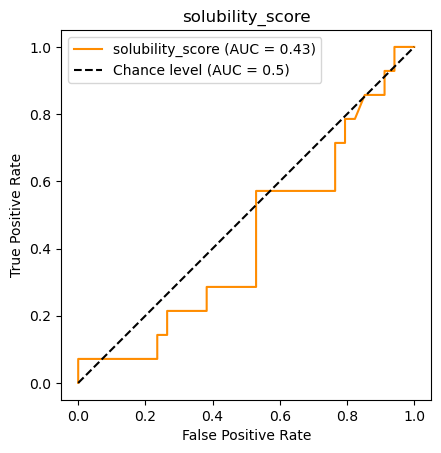

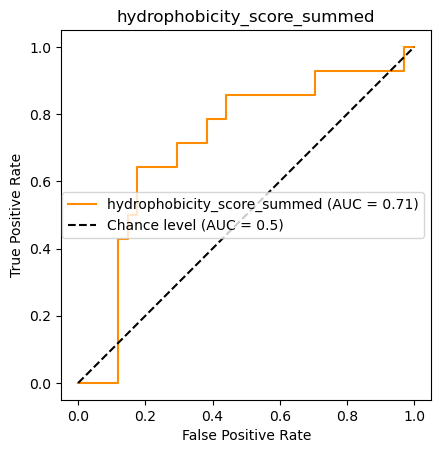

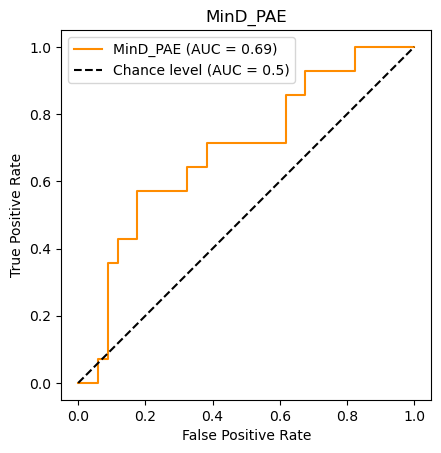

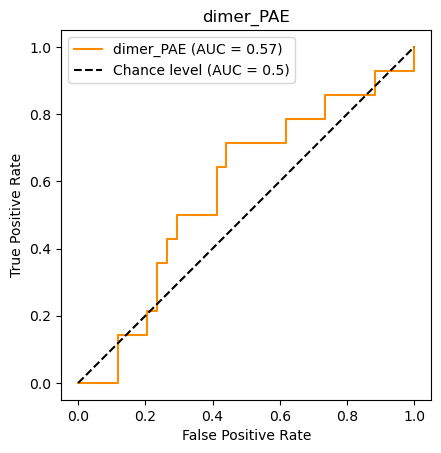

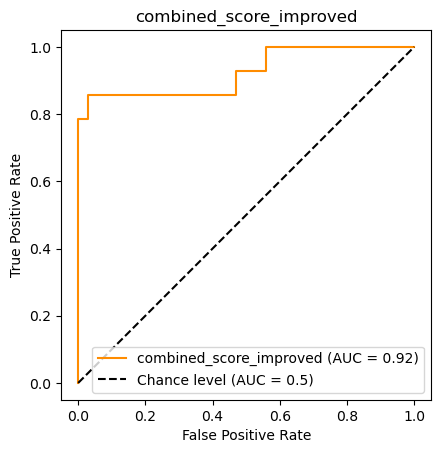

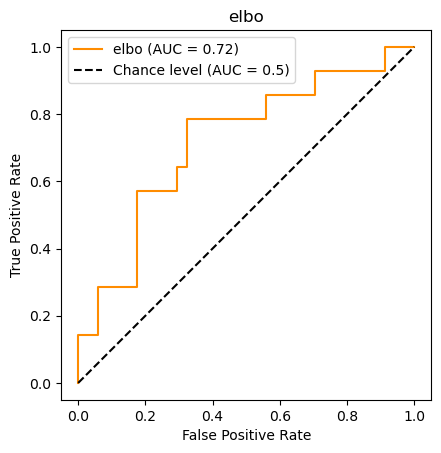

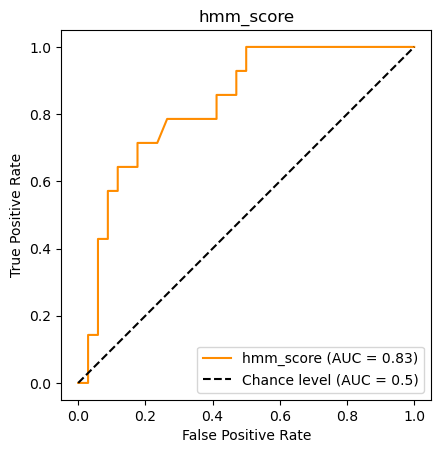

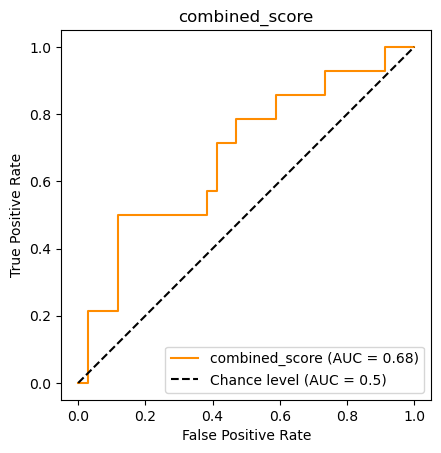

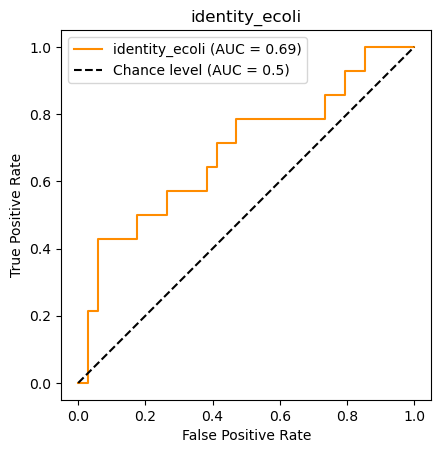

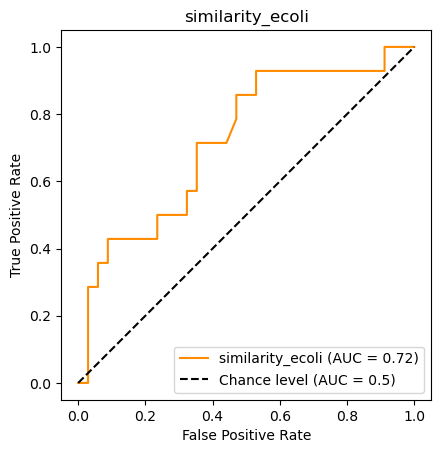

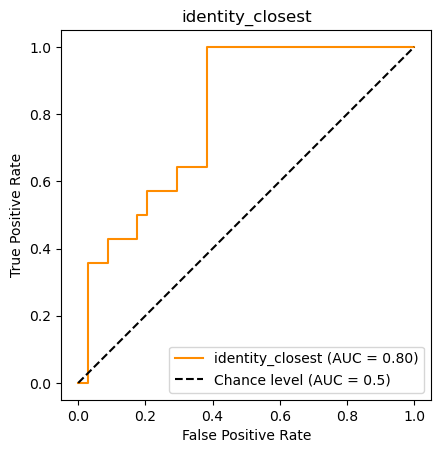

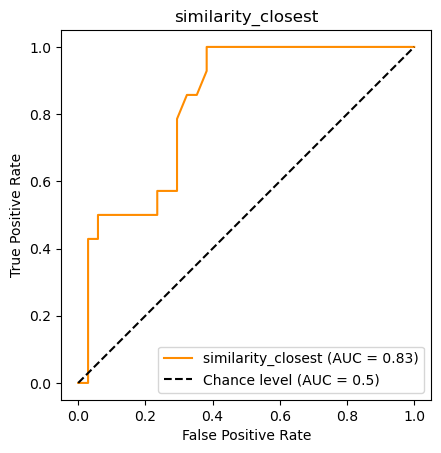

In [26]:
# AUC curves
from sklearn.metrics import RocCurveDisplay

for metric in ['solubility_score_normalised', 
               'hydrophobicity_score_summed_normalised', 
               'MinD_PAE_normalised', 
               'dimer_PAE_normalised', 
               'combined_score_improved_normalised', 
               'elbo_normalised',
               'hmm_score_normalised',
               'combined_score_normalised', 
               'identity_ecoli_normalised', 
               'similarity_ecoli_normalised', 
               'identity_closest_normalised', 
               'similarity_closest_normalised']:

    RocCurveDisplay.from_predictions(
        df_raw.positive_invitro,
        df_raw[metric],
        name=metric[:-11],
        color="darkorange",
        plot_chance_level=True,
    )
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(metric[:-11])
    plt.legend()
plt.show()

/var/folders/91/m82jhw1j777cjhwlgy6zj4sw0000gn/T/ipykernel_80539/3665235455.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.positive_invitro_int[df_raw['synMinE_name'] == 'synMinEv25'] = 2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Sol'),
  Text(1, 0, 'Dimer'),
  Text(2, 0, 'MinD'),
  Text(3, 0, 'hp'),
  Text(4, 0, 'c_init'),
  Text(5, 0, 'c_impr'),
  Text(6, 0, 'elbo'),
  Text(7, 0, 'hmm'),
  Text(8, 0, 'ident_ec'),
  Text(9, 0, 'sim_ec'),
  Text(10, 0, 'ident_cl'),
  Text(11, 0, 'sim_cl')])

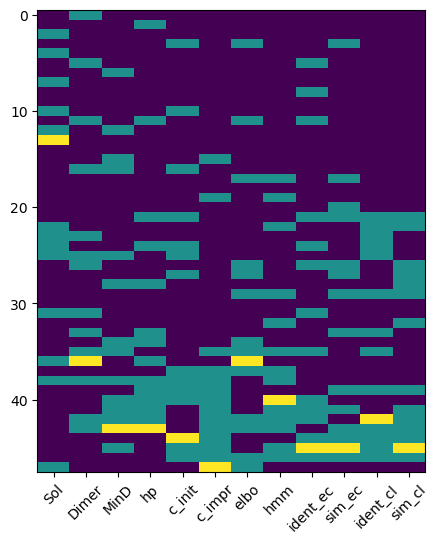

In [30]:
# plot sorted
metrics = ['solubility_score_normalised', 
           'dimer_PAE_normalised', 
           'MinD_PAE_normalised',
            'hydrophobicity_score_summed_normalised', 
            'combined_score_normalised', 
            'combined_score_improved_normalised', 
            'elbo_normalised',
            'hmm_score_normalised',
            'identity_ecoli_normalised', 
            'similarity_ecoli_normalised', 
            'identity_closest_normalised', 
            'similarity_closest_normalised']

metrics_short = {
    'solubility_score_normalised': 'Sol', 
    'hydrophobicity_score_summed_normalised': 'hp',
    'MinD_PAE_normalised': 'MinD',
    'dimer_PAE_normalised': 'Dimer',
    'combined_score_improved_normalised': 'c_impr', 
    'combined_score_normalised': 'c_init', 
    'identity_ecoli_normalised': 'ident_ec', 
    'similarity_ecoli_normalised': 'sim_ec', 
    'identity_closest_normalised': 'ident_cl',
    'similarity_closest_normalised': 'sim_cl',
    'elbo_normalised': 'elbo',
    'hmm_score_normalised': 'hmm',
}

x = np.zeros((48,len(metrics)))

df_raw['positive_invitro_int'] = df_raw['positive_invitro'].astype('int')
df_raw.positive_invitro_int[df_raw['synMinE_name'] == 'synMinEv25'] = 2

for i, metric in enumerate(metrics):
    x[:,i] = df_raw.sort_values(metric)['positive_invitro_int']

fig = plt.gcf()
fig.set_size_inches(5,6)
plt.imshow(x, aspect='auto')
plt.xticks(np.arange(len(metrics)),[metrics_short[i] for i in metrics])
plt.xticks(rotation=45)